<a href="https://colab.research.google.com/github/Andreaierardi/Fruits-Neural-Networks/blob/master/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Image classification with Machine Learning
---

## University of Milan 
### DataScience and Economics - Machine Learning Module







**Authors** : Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito

<br>


How to load the dataset: 



```python
from google.colab import drive
drive.mount('/content/gdrive')


import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


%cd /content/gdrive/My Drive/Kaggle


!kaggle datasets download --force -d moltean/fruits

!unzip fruits.zip
```



# Image classification with Neural Networks


## 1. The dataset
### 1.1 Libraries


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 

from plotnine import *
from sklearn.decomposition import PCA

from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn import preprocessing

from keras.utils import np_utils
from sklearn.utils import shuffle
import numpy as np

import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

from keras.applications import MobileNetV2


Using TensorFlow backend.


# 1.1 Data Loading

In [ ]:
DATADIR = "fruits-360/Training"
DATADIR_test = "fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                    file = os.path.join(path,img)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels

### Split in test and training sets




In [ ]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)

In [ ]:
x_train, y_train= train

In [ ]:
x_test, y_test = test

### Train and test shape


In [ ]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)

Train shape:
X:  (32607, 32, 32, 3)
y:  (32607,)
Test shape
X:  (10906, 32, 32, 3)
y:  (10906,)


# 1.2 Pre-processing

### Pre-process the labels and the images


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images


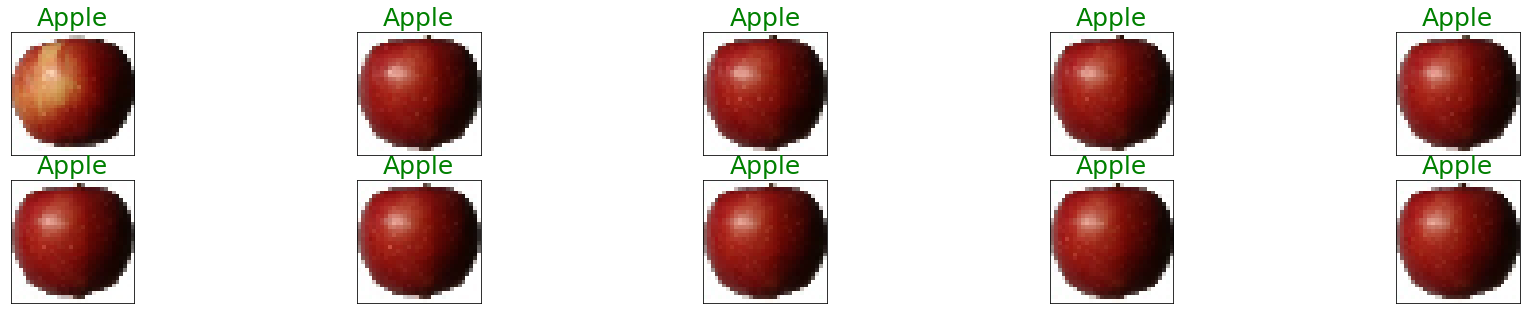

In [ ]:

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data


In [ ]:
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled


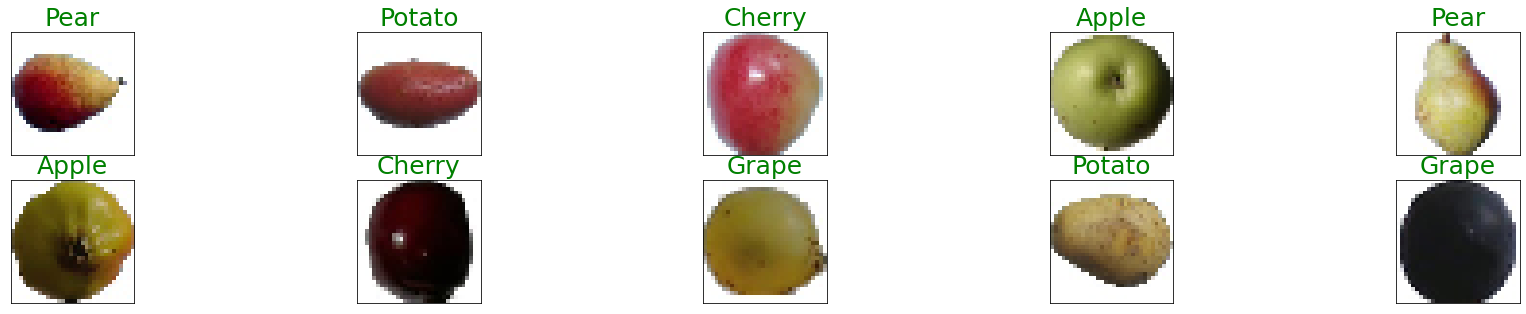

In [ ]:

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})



### Split in validation and test set


In [ ]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  10906
Validation split len: 8724


In [ ]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_valid = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Validation X : ',x_valid.shape)
print('Validation y :',y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (32607, 32, 32, 3)
Train y : (32607, 10)
1st training image shape  (32, 32, 3)
Validation X :  (8724, 32, 32, 3)
Validation y : (8724, 10)
Test X :  (2182, 32, 32, 3)
Test y :  (2182, 10)


### Definition of zero-one loss function 

In [ ]:
def zero_one(prediz,test):
    y_hat = []
    y_t = []
    for i in range(len(prediz)):
        y_hat.append(np.argmax(prediz[i]))
        y_t.append(np.argmax(test[i]))

   
    loss = []
    for i in range(len(prediz)):
        if(y_hat[i] == y_t[i]):
            loss.append(0)
        else:
            loss.append(1)


    return np.mean(loss)


# 1.3 PCA and feed-forward NN


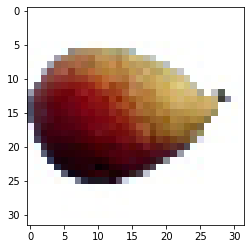

In [ ]:
plt.imshow(x_train[0])

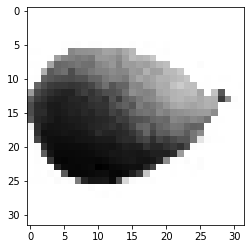

In [ ]:
x_train[0].shape
type(x_train[1])
rgb_weights = [0.2989, 0.5870, 0.1140]
image_test = x_train[0]
image_grey = np.dot(image_test[...,:3], rgb_weights)
plt.imshow(image_grey, cmap=plt.get_cmap("gray"))

In [ ]:
# transform np.ndarray from rgb to grey
x_train_grey = np.ndarray(shape=(x_train.shape[0], 32, 32))
for i in range(x_train.shape[0]):
    image_convert = x_train[i]
    x_train_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

x_valid_grey = np.ndarray(shape=(x_valid.shape[0], 32, 32))
for i in range(x_valid.shape[0]):
    image_convert = x_valid[i]
    x_valid_grey[i] = np.dot(image_convert[...,:3], rgb_weights)
    
x_test_grey = np.ndarray(shape=(x_test.shape[0], 32, 32))
for i in range(x_test.shape[0]):
    image_convert = x_test[i]
    x_test_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

In [ ]:
# flatten 32x32 images by concatenating them into a vector, each column of the matrix will be an image
x_train_flat = np.ndarray(shape=(1024, x_train_grey.shape[0]))
for i in range(x_train_grey.shape[0]):
    x_train_flat[:,i] = np.concatenate(x_train_grey[i])
    
x_valid_flat = np.ndarray(shape=(1024, x_valid_grey.shape[0]))
for i in range(x_valid_grey.shape[0]):
    x_valid_flat[:,i] = np.concatenate(x_valid_grey[i])
    
x_test_flat = np.ndarray(shape=(1024, x_test_grey.shape[0]))
for i in range(x_test_grey.shape[0]):
    x_test_flat[:,i] = np.concatenate(x_test_grey[i])

In [ ]:
standard_scaler = preprocessing.StandardScaler()
x_train_flat_T = standard_scaler.fit_transform(x_train_flat.T)
x_valid_flat_T = standard_scaler.transform(x_valid_flat.T)
x_test_flat_T = standard_scaler.transform(x_test_flat.T)

In [ ]:
x_train_flat_T.shape

(32607, 1024)

In [ ]:
x_train_flat = x_train_flat_T.T
x_valid_flat = x_valid_flat_T.T
x_test_flat = x_test_flat_T.T

In [ ]:
x_train_flat.shape

(1024, 32607)

In [ ]:
a = np.cov(x_train_flat)
b = np.linalg.eig(a)
b[0].shape

(1024,)

In [ ]:
b

(array([384.41591328,  86.57192039,  60.39849467, ...,   0.        ,
          0.        ,   0.        ]),
 array([[-2.77148730e-03,  1.99671963e-02, -7.00245270e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.06770166e-04,  5.26867240e-03, -3.60037909e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.31497722e-04,  4.57673250e-03, -2.40477865e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 9.24994377e-04,  3.61739014e-03,  2.95348978e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.13335613e-03,  5.13559532e-03,  3.96259018e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))

### PCA explained variance ratio and "Eigenfruits"

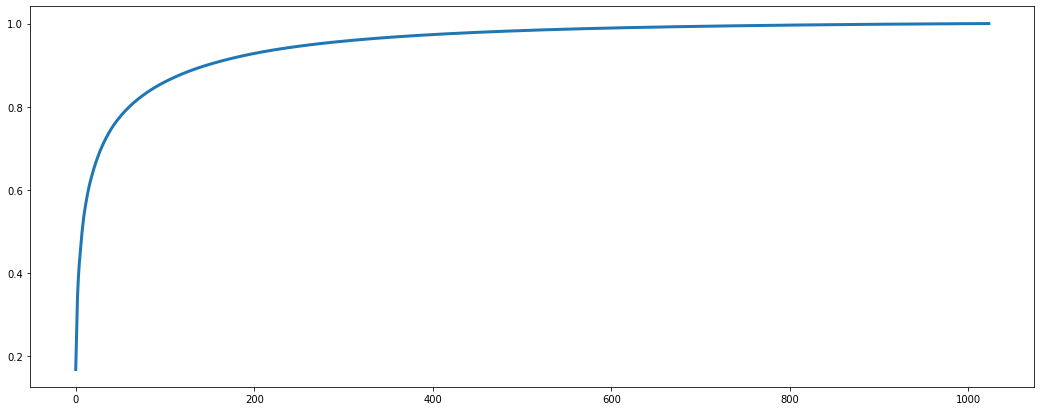

In [ ]:
pca = PCA().fit(x_train_flat)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

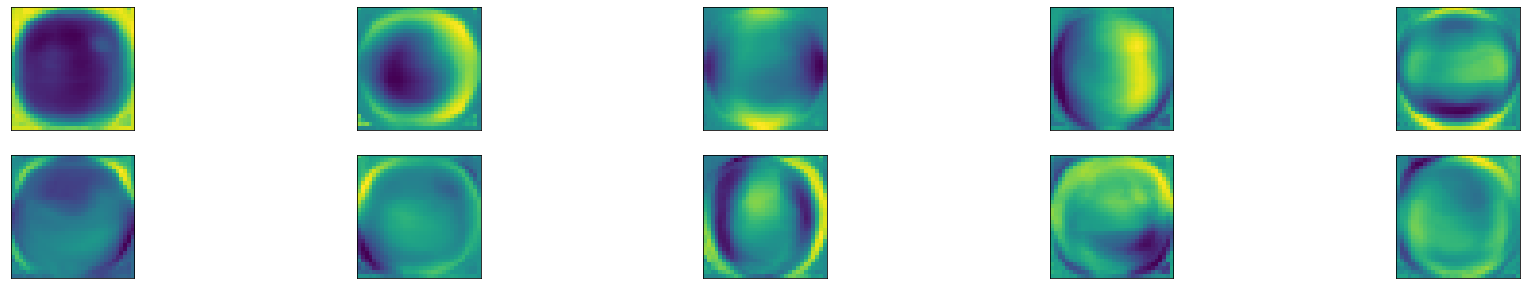

In [ ]:
# try to plot some of the eigenvectors, the so called "eigenfruits"
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(b[1][:,i].reshape(32,32)))



### Reduce image noise with PCA


In [ ]:
x_train_flat.shape, x_valid_flat.shape, x_test_flat.shape

((1024, 32607), (1024, 8724), (1024, 2182))

In [ ]:

def PCA_iter(x_all,start, end, step):
    lis =[]
    for i in range(start, end, step):
                print("\n\n===== Component: ",i,"=====\n")
            
                (train,valid, test) = x_all
                pca = PCA(n_components=i)
                print("original shape:   ", train.shape)

                
                pca.fit_transform(train)
                
                train_PCA =  pca.transform(train)
                train_new = pca.inverse_transform(train_PCA)

                valid_PCA =  pca.transform(valid)       
                valid_new = pca.inverse_transform(valid_PCA)
                
                
                test_PCA = pca.transform(test)
                test_new = pca.inverse_transform(test_PCA)

                
                print("transformed shape:", train_PCA.shape)
                print("final shape:", train_new.shape)

                tupla = (x_train_PCA, x_valid_PCA, x_test_PCA) =train_new,valid_new,test_new
                
                lis.append(tupla)
    return lis

In [ ]:
lis_PCA =  PCA_iter((x_train_flat_T,x_valid_flat_T, x_test_flat_T),10,211,20)



===== Component:  10 =====

original shape:    (32607, 1024)
transformed shape: (32607, 10)
final shape: (32607, 1024)


===== Component:  30 =====

original shape:    (32607, 1024)
transformed shape: (32607, 30)
final shape: (32607, 1024)


===== Component:  50 =====

original shape:    (32607, 1024)
transformed shape: (32607, 50)
final shape: (32607, 1024)


===== Component:  70 =====

original shape:    (32607, 1024)
transformed shape: (32607, 70)
final shape: (32607, 1024)


===== Component:  90 =====

original shape:    (32607, 1024)
transformed shape: (32607, 90)
final shape: (32607, 1024)


===== Component:  110 =====

original shape:    (32607, 1024)
transformed shape: (32607, 110)
final shape: (32607, 1024)


===== Component:  130 =====

original shape:    (32607, 1024)
transformed shape: (32607, 130)
final shape: (32607, 1024)


===== Component:  150 =====

original shape:    (32607, 1024)
transformed shape: (32607, 150)
final shape: (32607, 1024)


===== Component:  170 ==

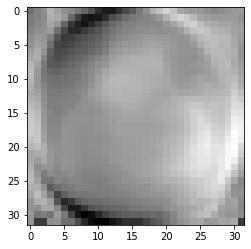

In [ ]:
# 10 components example of the same image
tr,va,te  = lis_PCA[1] 
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))

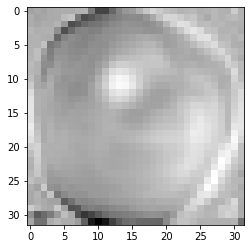

In [ ]:
# 210 components example of an image
tr,va,te  = lis_PCA[len(lis_PCA)-1]
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))


## Train feed-forward NN with reduced images


In [ ]:
def FW_iter(lis_PCA, ep, bs):
    lis_FW = []
    epochs = ep
    batch_size = bs
    for itr in range(len(lis_PCA)):
        x_train_PCA, x_valid_PCA, x_test_PCA = lis_PCA[itr]
        
       
        print("FW- components: ",(itr+1)*20-10)
        #feed forward neural network
        model = tf.keras.Sequential([
          tf.keras.layers.Input(shape = (1024)),
          tf.keras.layers.Dense(32, activation = "relu"),
          tf.keras.layers.Dense(10, activation='softmax')
          ])
        model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
        
        
        history = model.fit(x_train_PCA, y_train,
                        batch_size = bs,
                        epochs = epochs,
                        validation_data=(x_valid_PCA, y_valid),
                        verbose = 2

                      )
        
        y_pred = model.predict(x_test_PCA).round()
        
        zo_loss = zero_one(y_pred,y_test)
        print("Zero-one loss: ",zo_loss)
        tupla = (history, model, zo_loss)
        lis_FW.append(tupla)
    return lis_FW

In [ ]:
epochs = 10
batch_size = 32
res = FW_iter(lis_PCA, epochs, batch_size)

FW- components:  10
Epoch 1/10
1019/1019 - 5s - loss: 0.8917 - accuracy: 0.6877 - val_loss: 1.3535 - val_accuracy: 0.5962
Epoch 2/10
1019/1019 - 5s - loss: 0.6398 - accuracy: 0.7802 - val_loss: 1.3279 - val_accuracy: 0.6405
Epoch 3/10
1019/1019 - 5s - loss: 0.5631 - accuracy: 0.8033 - val_loss: 1.2432 - val_accuracy: 0.6723
Epoch 4/10
1019/1019 - 5s - loss: 0.5202 - accuracy: 0.8203 - val_loss: 1.2590 - val_accuracy: 0.6750
Epoch 5/10
1019/1019 - 5s - loss: 0.4846 - accuracy: 0.8326 - val_loss: 1.3413 - val_accuracy: 0.6714
Epoch 6/10
1019/1019 - 5s - loss: 0.4573 - accuracy: 0.8445 - val_loss: 1.2513 - val_accuracy: 0.6985
Epoch 7/10
1019/1019 - 5s - loss: 0.4322 - accuracy: 0.8521 - val_loss: 1.2741 - val_accuracy: 0.6983
Epoch 8/10
1019/1019 - 5s - loss: 0.4193 - accuracy: 0.8566 - val_loss: 1.3041 - val_accuracy: 0.7063
Epoch 9/10
1019/1019 - 5s - loss: 0.4008 - accuracy: 0.8640 - val_loss: 1.3032 - val_accuracy: 0.7003
Epoch 10/10
1019/1019 - 5s - loss: 0.3982 - accuracy: 0.8641 -

In [ ]:
df = pd.DataFrame(
columns = ['epochs', 'valid', 'components', 'accuracy', 'value']
)

for itr in range(len(res)):
  
    time =  [i for i in range(1,epochs+1)]
    valids =  [0 for i in range(1,epochs+1)]
    components = [(itr+1)*20-10 for i in range(1,epochs+1)]
   

    accur = [1 for i in range(1,epochs+1)]
    acc = res[itr][0].history['accuracy']
    
    df1=  pd.DataFrame(data= np.vstack((time,valids,components,accur,acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    loss= res[itr][0].history['loss']
    accur = [0 for i in range(1,epochs+1)]
    df2=  pd.DataFrame(data= np.vstack((time,valids,components,accur,loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    valids =  [1 for i in range(1,epochs+1)]
    accur = [1 for i in range(1,epochs+1)]
    val_acc = res[itr][0].history['val_accuracy']
    
    df3=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    accur = [0 for i in range(1,epochs+1)]

    val_loss = res[itr][0].history['val_loss']
    df4=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])
   
    df = df.append(df1.append(df2).append(df3).append(df4))

In [ ]:
df['components'] = df['components'].astype('category')
df = df.assign(accuracy = ['accuracy' if accuracy == 1. else 'loss' for accuracy in df['accuracy']])
df = df.assign(valid = ['validation' if valid == 1. else 'training' for valid in df['valid']])
df['accuracy'].unique()

array(['accuracy', 'loss'], dtype=object)

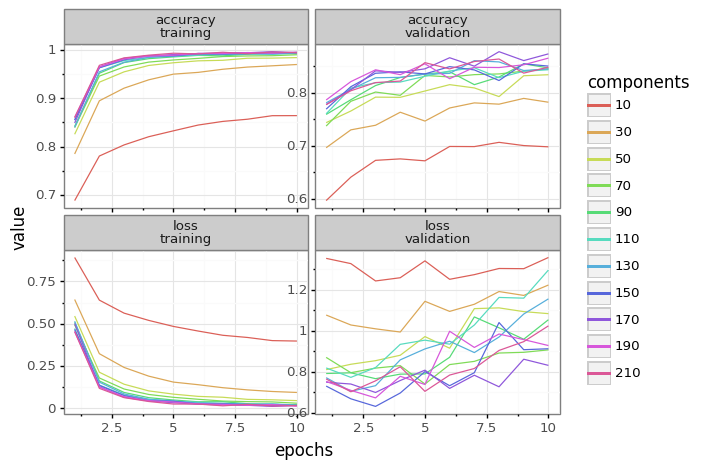

<ggplot: (8758028328796)>

In [ ]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid'],scales='free') +  theme_bw(base_size=12)

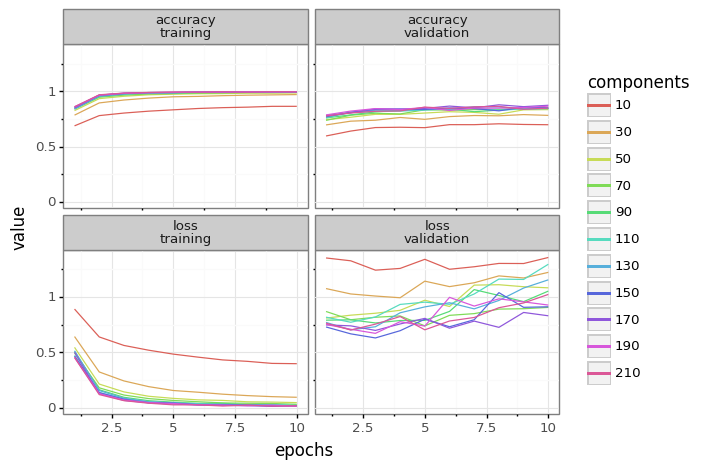

<ggplot: (-9223363278826112789)>

In [ ]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid']) + \
    theme_bw(base_size=12)

## Feed-Forward Zero-One Loss

In [ ]:
df_loss = pd.DataFrame(
columns = ['components', 'zero_one']
)

losses =[]

for i in range(len(res)):
    losses.append(res[i][2])
components = [i for i in range(10,211,20)]

In [ ]:
df_loss = pd.DataFrame( data = [components,losses], index = ['components', 'zero_one']).T

In [ ]:
df_loss

,components,zero_one
0,10.0,0.286893
1,30.0,0.197984
2,50.0,0.159028
3,70.0,0.145738
4,90.0,0.156279
5,110.0,0.148488
6,130.0,0.152154
7,150.0,0.141155
8,170.0,0.124656
9,190.0,0.125573


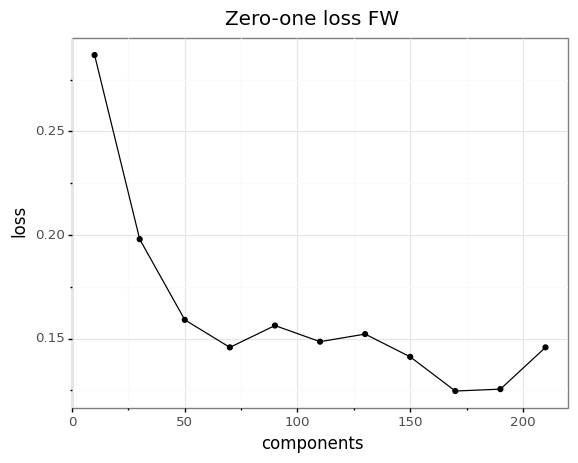

<ggplot: (-9223363278721333202)>

In [ ]:
ggplot(df_loss, aes(x='components', y='zero_one')) + \
    geom_line() + \
    geom_point() + \
    theme_bw(base_size=12) + ggtitle("Zero-one loss FW") + ylab("loss")

# 1.4  Convolutional Neural Newtworks

## One VGG block CNN


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
___________________________________________

In [ ]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2
                   )

Epoch 1/10
1019/1019 - 12s - loss: 0.2258 - accuracy: 0.9251 - val_loss: 0.1457 - val_accuracy: 0.9591
Epoch 2/10
1019/1019 - 11s - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.1096 - val_accuracy: 0.9716
Epoch 3/10
1019/1019 - 11s - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0620 - val_accuracy: 0.9841
Epoch 4/10
1019/1019 - 11s - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.1105 - val_accuracy: 0.9822
Epoch 5/10
1019/1019 - 11s - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.1179 - val_accuracy: 0.9836
Epoch 6/10
1019/1019 - 11s - loss: 0.0080 - accuracy: 0.9989 - val_loss: 0.1146 - val_accuracy: 0.9782
Epoch 7/10
1019/1019 - 11s - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.1395 - val_accuracy: 0.9790
Epoch 8/10
1019/1019 - 11s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.1240 - val_accuracy: 0.9827
Epoch 9/10
1019/1019 - 11s - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.1455 - val_accuracy: 0.9733
Epoch 10/10
1019/1019 - 11s - loss: 0.0029 - accuracy: 0.9994 - val_loss:

In [ ]:
y_pred = model.predict(x_test)

cnn_loss = [] 
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)
cnn_loss.append(zol)

Zero-one Loss:  0.02153987167736022


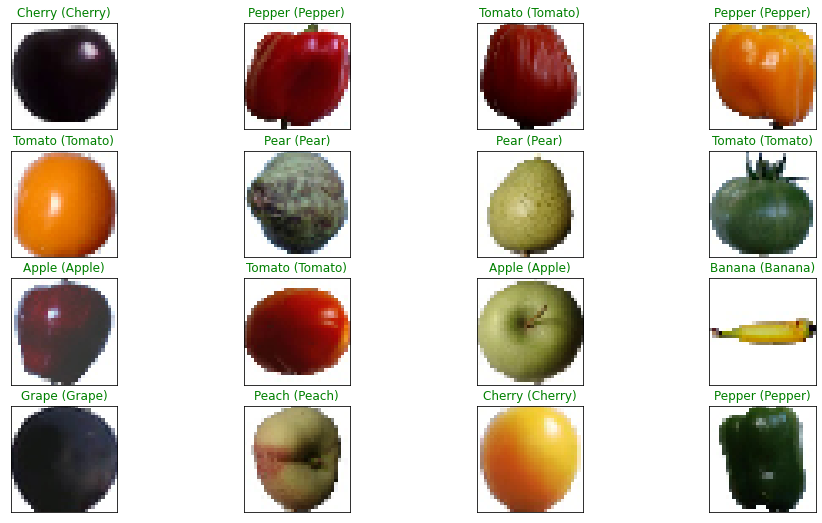

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



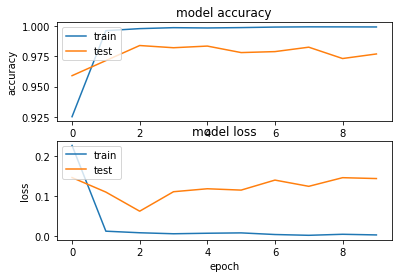

In [ ]:
#Loss and accuracy visualisation

plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


## Two VGG blocks



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)            

In [ ]:
history2 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2

                   )

Epoch 1/10
1019/1019 - 14s - loss: 0.2516 - accuracy: 0.9158 - val_loss: 0.1399 - val_accuracy: 0.9559
Epoch 2/10
1019/1019 - 13s - loss: 0.0240 - accuracy: 0.9931 - val_loss: 0.0467 - val_accuracy: 0.9812
Epoch 3/10
1019/1019 - 13s - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.0338 - val_accuracy: 0.9900
Epoch 4/10
1019/1019 - 13s - loss: 3.4333e-05 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 5/10
1019/1019 - 13s - loss: 1.1592e-05 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 6/10
1019/1019 - 13s - loss: 5.8665e-06 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 7/10
1019/1019 - 13s - loss: 2.9794e-06 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9903
Epoch 8/10
1019/1019 - 13s - loss: 1.6845e-06 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9906
Epoch 9/10
1019/1019 - 13s - loss: 9.3372e-07 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 10/10
1019/1019 - 14s - loss: 5.2326e-07 - 

In [ ]:
# evaluate zero-one loss
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)

Zero-one Loss:  0.00916590284142988


## Three VGG blocks

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)       

In [ ]:
history3 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2 

                   )

Epoch 1/10
1019/1019 - 19s - loss: 0.3207 - accuracy: 0.8886 - val_loss: 0.0736 - val_accuracy: 0.9760
Epoch 2/10
1019/1019 - 18s - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.2608 - val_accuracy: 0.9379
Epoch 3/10
1019/1019 - 18s - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0518 - val_accuracy: 0.9861
Epoch 4/10
1019/1019 - 18s - loss: 8.6958e-05 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9917
Epoch 5/10
1019/1019 - 18s - loss: 9.9077e-06 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9928
Epoch 6/10
1019/1019 - 18s - loss: 4.4342e-06 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9925
Epoch 7/10
1019/1019 - 18s - loss: 2.2970e-06 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 0.9925
Epoch 8/10
1019/1019 - 18s - loss: 1.2628e-06 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9932
Epoch 9/10
1019/1019 - 18s - loss: 6.9922e-07 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9940
Epoch 10/10
1019/1019 - 18s - loss: 3.8787e-07 - 

In [ ]:
# evaluate zero-one loss
y_pred = model.predict(x_test)

zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)


Zero-one Loss:  0.00916590284142988


## Three VGG blocks with Dropout


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)        

In [ ]:
history4 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2
                   )

Epoch 1/10
1019/1019 - 20s - loss: 0.4977 - accuracy: 0.8243 - val_loss: 0.1280 - val_accuracy: 0.9546
Epoch 2/10
1019/1019 - 19s - loss: 0.0688 - accuracy: 0.9775 - val_loss: 0.1614 - val_accuracy: 0.9452
Epoch 3/10
1019/1019 - 19s - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0644 - val_accuracy: 0.9795
Epoch 4/10
1019/1019 - 19s - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0873 - val_accuracy: 0.9727
Epoch 5/10
1019/1019 - 19s - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.1079 - val_accuracy: 0.9783
Epoch 6/10
1019/1019 - 19s - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0799 - val_accuracy: 0.9782
Epoch 7/10
1019/1019 - 20s - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.2361 - val_accuracy: 0.9506
Epoch 8/10
1019/1019 - 19s - loss: 0.0189 - accuracy: 0.9949 - val_loss: 0.1377 - val_accuracy: 0.9713
Epoch 9/10
1019/1019 - 19s - loss: 0.0246 - accuracy: 0.9928 - val_loss: 0.0759 - val_accuracy: 0.9793
Epoch 10/10
1019/1019 - 19s - loss: 0.0190 - accuracy: 0.9952 - val_loss:

In [ ]:
# evaluate zero-one loss
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)

Zero-one Loss:  0.07561869844179651


## Three VGG blocks with Dropout and Batch Normalization


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)      

In [ ]:
history5 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2
                   )

Epoch 1/10
1019/1019 - 22s - loss: 0.3911 - accuracy: 0.8740 - val_loss: 0.1592 - val_accuracy: 0.9462
Epoch 2/10
1019/1019 - 21s - loss: 0.0870 - accuracy: 0.9735 - val_loss: 0.0608 - val_accuracy: 0.9725
Epoch 3/10
1019/1019 - 21s - loss: 0.0421 - accuracy: 0.9875 - val_loss: 0.0188 - val_accuracy: 0.9944
Epoch 4/10
1019/1019 - 21s - loss: 0.0428 - accuracy: 0.9876 - val_loss: 0.0137 - val_accuracy: 0.9958
Epoch 5/10
1019/1019 - 21s - loss: 0.0259 - accuracy: 0.9927 - val_loss: 0.0061 - val_accuracy: 0.9978
Epoch 6/10
1019/1019 - 22s - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0168 - val_accuracy: 0.9929
Epoch 7/10
1019/1019 - 21s - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0430 - val_accuracy: 0.9826
Epoch 8/10
1019/1019 - 21s - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0387 - val_accuracy: 0.9829
Epoch 9/10
1019/1019 - 21s - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0207 - val_accuracy: 0.9916
Epoch 10/10
1019/1019 - 21s - loss: 0.0140 - accuracy: 0.9956 - val_loss:

In [ ]:
# evaluate zero-one loss
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)


Zero-one Loss:  0.005957836846929423


## VGG CNN results

**One VGG block**

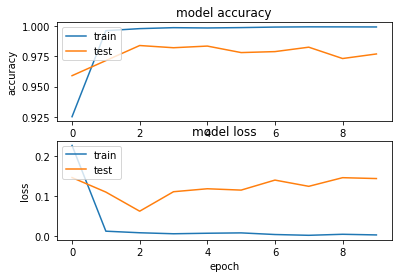

In [ ]:

plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()





**Two VGG block**

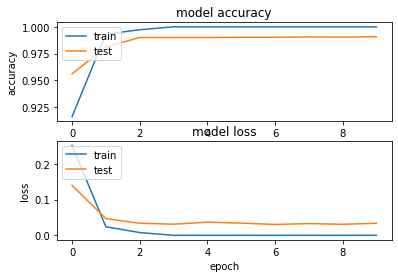

In [ ]:

plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history2.history['accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

**Three VGG block**

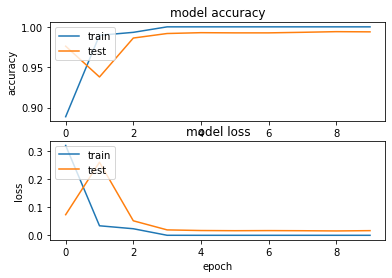

In [ ]:

plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history3.history['accuracy'])  
plt.plot(history3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history3.history['loss'])  
plt.plot(history3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

**Three VGG block with Dropout**

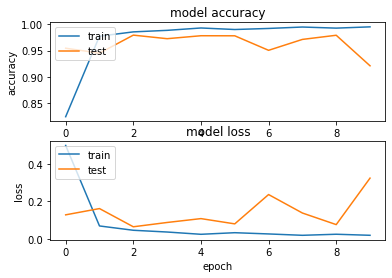

In [ ]:

plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history4.history['accuracy'])  
plt.plot(history4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history4.history['loss'])  
plt.plot(history4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

**Three VGG block with Dropout and Batch Normalization**

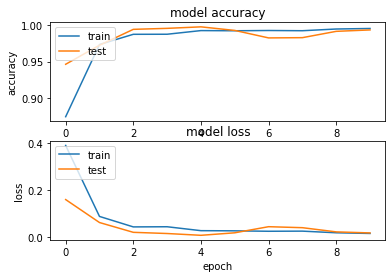

In [ ]:

plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history5.history['accuracy'])  
plt.plot(history5.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history5.history['loss'])  
plt.plot(history5.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## VGG Zero-One Loss

In [ ]:
cnn_loss

[0.02153987167736022,
 0.00916590284142988,
 0.00916590284142988,
 0.07561869844179651,
 0.005957836846929423]

In [ ]:
df_cnn_loss = pd.DataFrame(
columns = ['type', 'zero_one']
)

types = ["1VGG","2VGG","3VGG","3VGG-drop", "3VGG-drop-norm"]
df_cnn_loss = pd.DataFrame( data = [types,cnn_loss], index = ['types', 'zero_one']).T

In [ ]:
df_cnn_loss

,types,zero_one
0,1VGG,0.0215399
1,2VGG,0.0091659
2,3VGG,0.0091659
3,3VGG-drop,0.0756187
4,3VGG-drop-norm,0.00595784


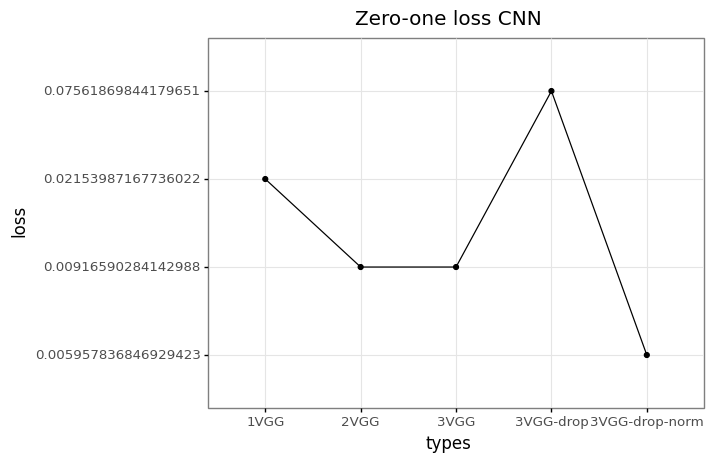

<ggplot: (8757990059065)>

In [ ]:
ggplot(df_cnn_loss, aes(x='types', y='zero_one',group=1)) + \
    geom_point() + \
    geom_line() + \
    theme_bw(base_size=12) + ggtitle("Zero-one loss CNN") + ylab("loss")


# 1.5 LeNet Neural Networks


In [ ]:

input_shape = (32,32,3)
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_33 (Dense)             (None, 84)              

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(x_valid, y_valid),
                    verbose = 2

                    )

Epoch 1/10
1019/1019 - 8s - loss: 0.3274 - accuracy: 0.9028 - val_loss: 0.1608 - val_accuracy: 0.9496
Epoch 2/10
1019/1019 - 7s - loss: 0.0138 - accuracy: 0.9977 - val_loss: 0.0819 - val_accuracy: 0.9768
Epoch 3/10
1019/1019 - 9s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9735
Epoch 4/10
1019/1019 - 7s - loss: 6.4137e-04 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9779
Epoch 5/10
1019/1019 - 7s - loss: 3.2755e-04 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9799
Epoch 6/10
1019/1019 - 7s - loss: 1.7176e-04 - accuracy: 1.0000 - val_loss: 0.0822 - val_accuracy: 0.9790
Epoch 7/10
1019/1019 - 7s - loss: 9.9440e-05 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9815
Epoch 8/10
1019/1019 - 8s - loss: 5.2685e-05 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9813
Epoch 9/10
1019/1019 - 7s - loss: 2.9746e-05 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 0.9812
Epoch 10/10
1019/1019 - 7s - loss: 1.6986e-05 - accuracy: 

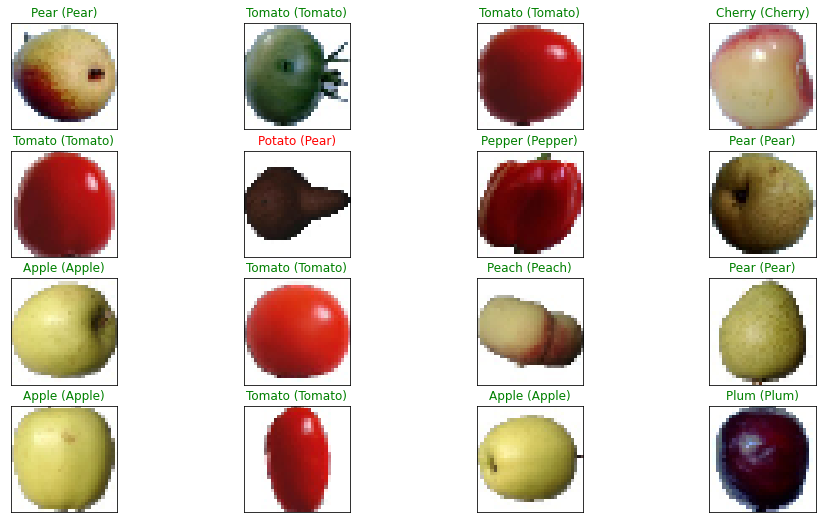

In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

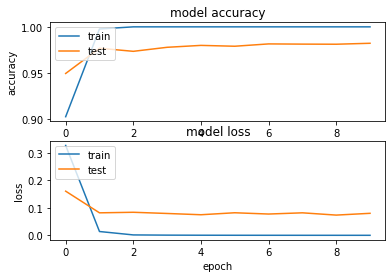

In [ ]:
plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()



In [ ]:
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)

Zero-one Loss:  0.016498625114573784


# 1.6 MobileNetV2

In [ ]:

model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=10)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
print('Compiled!')


Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_12[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [ ]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2  )

Train on 32607 samples, validate on 8724 samples
Epoch 1/10
 - 152s - loss: 0.6746 - accuracy: 0.7860 - val_loss: 2.2316 - val_accuracy: 0.1977
Epoch 2/10
 - 148s - loss: 0.1768 - accuracy: 0.9496 - val_loss: 2.2468 - val_accuracy: 0.1977
Epoch 3/10
 - 148s - loss: 0.1177 - accuracy: 0.9681 - val_loss: 2.2137 - val_accuracy: 0.1977
Epoch 4/10
 - 147s - loss: 0.1166 - accuracy: 0.9705 - val_loss: 2.1745 - val_accuracy: 0.1977
Epoch 5/10
 - 147s - loss: 0.0993 - accuracy: 0.9756 - val_loss: 0.8243 - val_accuracy: 0.7942
Epoch 6/10
 - 149s - loss: 0.0763 - accuracy: 0.9815 - val_loss: 0.9804 - val_accuracy: 0.7658
Epoch 7/10
 - 146s - loss: 0.0685 - accuracy: 0.9836 - val_loss: 2.2230 - val_accuracy: 0.6530
Epoch 8/10
 - 149s - loss: 0.0582 - accuracy: 0.9859 - val_loss: 9.0434 - val_accuracy: 0.4411
Epoch 9/10
 - 148s - loss: 0.0601 - accuracy: 0.9856 - val_loss: 4.6619 - val_accuracy: 0.6551
Epoch 10/10
 - 149s - loss: 0.0429 - accuracy: 0.9905 - val_loss: 2.4783 - val_accuracy: 0.7839


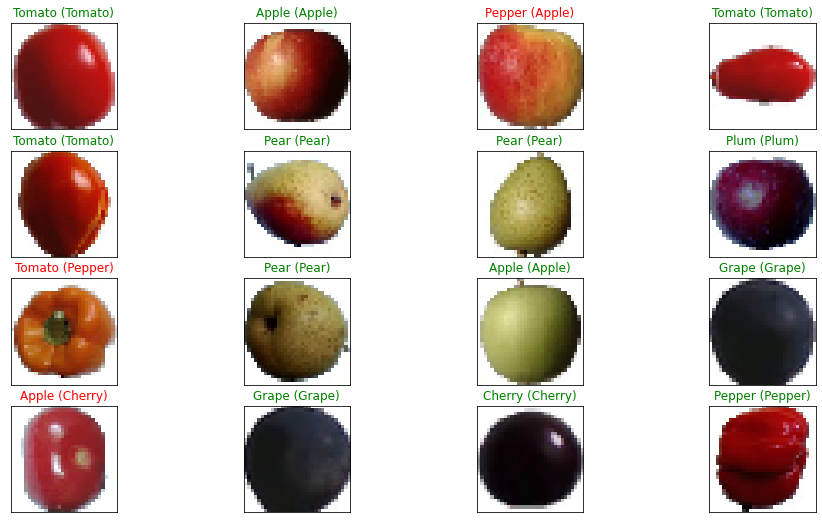

In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



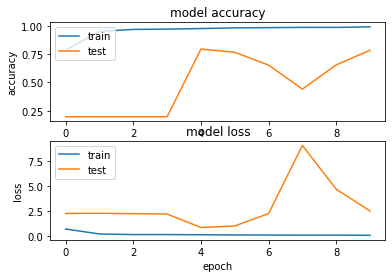

In [ ]:

plt.figure(1)  
   
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [ ]:
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)
cnn_loss.append(zol)
print("Zero-one Loss: ", zol)


Zero-one Loss:  0.18973418881759854


# 1.7 Summary results

In [ ]:
df_cnn_loss = pd.DataFrame(
columns = ['type', 'zero_one']
)

types = ["1VGG","2VGG","3VGG","3VGG-drop", "3VGG-drop-norm","LeNet","MobileNetV2"]
df_cnn_loss = pd.DataFrame( data = [types,cnn_loss], index = ['types', 'zero_one']).T



df_new = df_loss.rename(columns={'components': 'types'})
df_new['types'] = df_new['types'].astype(str)



In [ ]:
frames = [df_new, df_cnn_loss]
result = pd.concat(frames)
result = result.sort_values(by=['zero_one'])

result = result.reset_index(drop=True)



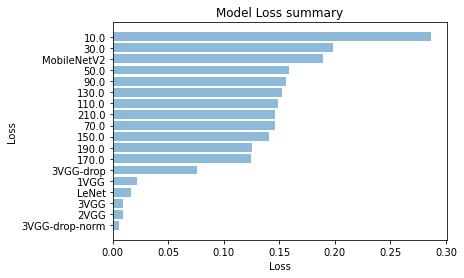

In [ ]:

plt.barh(  result['types'].values,result['zero_one'].values , align='center', alpha=0.5)
plt.xlabel('Loss')
plt.ylabel("Loss")
plt.title('Model Loss summary')

plt.show()